## About this resource

All of the tutorial notebooks as well as information about the dependent package (`nma-ibl`) can be found at [nma-ibl GitHub repository](https://github.com/int-brain-lab/nma-ibl).

## Setting up the environment (particularly for Colab users)

Please execute the cells below to install the necessary dependencies and prepare the environment.

In [2]:
  # install IBL pipeline package to access and navigate the pipeline
!pip install --quiet nma-ibl

# Download data needed for plot recreation
!wget https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy

     |████████████████████████████████| 101 kB 4.1 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 4.1 MB 24.7 MB/s 
     |████████████████████████████████| 78 kB 6.1 MB/s 
--2022-07-20 13:54:35--  https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/datajoint-company/nma-ibl/raw/master/uuids_trained1.npy [following]
--2022-07-20 13:54:35--  https://github.com/datajoint-company/nma-ibl/raw/master/uuids_trained1.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/datajoint-company/nma-ibl/master/uuids_trained1.npy [following]
--2022-07-20 13:54:35--  https://raw.githubu

# Replication of study figures 

One of the immense strenghts of [DataJoint](https://datajoint.io) pipelines lies in the tight data integrity and full tracking of all processing and computations as captured by the data pipeline. Here we demonstrate how a study figure based on the IBL pipeline can be replicated using data freshly fetched from the data pipeline.

In the study [A standardized and reproducible method to measure decision-making in mice](https://doi.org/10.1101/2020.01.17.909838), the authors have shown that the animal behavior in a visual decision-making task is similar across 9 labs in 7 institutions across 3 countries, when using a standardized, reproduciable experimental hardware, software, and procedures.

This notebook replicates Figure 2 from that work, which shows a similar learning rate of animals across different labs.
This notebook was generated based on [this repository](https://github.com/int-brain-lab/paper-behavior), allowing us to perform figure replications on a local machine!

Let's connect to the database again. Be sure to replace `{PASSWORD}` with the actual password you received in the email:

In [3]:
import datajoint as dj

dj.config['database.host'] = 'datajoint-public.internationalbrainlab.org'
dj.config['database.user'] = 'ibl-public'
dj.config['database.password'] = 'ibl-public'
dj.conn() # explicitly verify that the connection to database can be established

[2022-07-20 13:54:38,784][INFO]: Connecting ibl-public@datajoint-public.internationalbrainlab.org:3306
[2022-07-20 13:54:39,166][INFO]: Connected ibl-public@datajoint-public.internationalbrainlab.org:3306


DataJoint connection (connected) ibl-public@datajoint-public.internationalbrainlab.org:3306

# Import modules

To start with, we import some modules that will be used in the rest of the notebook:

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

We also import modules that allow us to interact with the schemas and tables in the IBL DataJoint pipeline.

In [5]:
from nma_ibl import reference, subject, behavior_analyses

In [6]:
ephys = dj.create_virtual_module('ephys', 'ibl_ephys')
behavior = dj.create_virtual_module('behavior', 'ibl_behavior')

In [7]:
behavior.TrialSet.Trial()

subject_uuid,session_start_time start time,trial_id trial identification number,trial_start_time beginning of quiescent period time (seconds),trial_end_time end of iti (seconds),"trial_response_time Time of ""response"" in choiceworld (seconds). This is when one of the three possible choices is registered in software, will not be the same as when the mouse's movement to generate that response begins.",trial_response_choice which choice was made in choiceworld,trial_stim_on_time Time of stimulus in choiceworld (seconds),trial_stim_contrast_left contrast of the stimulus on the left,trial_stim_contrast_right contrast of the stimulus on the right,trial_feedback_time Time of feedback delivery (reward or not) in choiceworld,"trial_feedback_type whether feedback is positive or negative in choiceworld (-1 for negative, +1 for positive)","trial_rep_num the repetition number of the trial, i.e. how many trials have been repeated on this side (counting from 1)",trial_go_cue_time,trial_go_cue_trigger_time,trial_stim_prob_left probability of the stimulus being present on left,trial_reward_volume reward volume of each trial,trial_iti_duration inter-trial interval,trial_included whether the trial should be included
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,1,0.0,6.410003,3.91,CW,1.5667,0.0,1.0,nan,-1,None,nan,1.5668,0.5,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,2,6.857100000000001,16.580802,14.0808,CCW,7.783600000000002,1.0,0.0,nan,-1,None,nan,7.7837,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,3,16.9776,38.342403000000004,35.8424,CCW,17.633,1.0,0.0,nan,-1,None,nan,17.6331,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,4,38.813500000000005,45.814603000000005,43.3146,CCW,41.33200000000001,1.0,0.0,nan,-1,None,nan,41.3321,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,5,46.2064,56.244803000000005,54.7449,CCW,46.91629999999999,0.0,1.0,54.7449,1,None,nan,46.9164,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,6,56.6314,67.092002,64.592,CCW,57.415800000000004,1.0,0.0,nan,-1,None,nan,57.4159,0.5,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,7,67.4791,81.22210199999999,78.7221,CCW,68.06530000000001,1.0,0.0,nan,-1,None,nan,68.0654,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,8,81.6323,104.89850299999999,103.3986,CCW,82.899,0.0,1.0,103.3986,1,None,nan,82.8991,0.9,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,9,105.37299999999999,109.928902,107.42889999999998,CCW,106.06549999999999,0.5,0.0,nan,-1,None,nan,106.066,0.5,nan,nan,None
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,10,110.2822,116.328402,113.8284,CCW,110.9315,0.5,0.0,nan,-1,None,nan,110.932,0.9,nan,nan,None


Here are some overview of what each schema contains:
* `reference` schema contains lab, user and project information
* `subject` schema contains information about subjects
* `behavior_analyses` schema contains results of standardized analyses, including the training status

Here are some modules that defines pre-defined figure settings

In [8]:
from nma_ibl.paper_behavior_functions import (query_subjects, seaborn_style,
                                              group_colors, institution_map, seaborn_style)

# Initialize figure settings

In [9]:
seaborn_style()
pal = group_colors()
institution_map, col_names = institution_map()
col_names = col_names[:-1]

<Figure size 432x288 with 0 Axes>

# Query subjects that are trained

We pre-selected the "trained" animals based on the following criteria and save their uuids in the file `uuids_trained1.npy`
- 0% and 6% contrasts had been introduced to the contrast set.   
- 200 trials were completed with >80% performance on easy (100% and 50% contrasts) trials in each of the last three sessions. 
- A four-parameter psychometric curve (bias, lapse left, lapse right, threshold) fitted to performance on all trials from the last three sessions had parameter values of bias < 16, threshold < 19, and lapses < 0.2.


In [10]:
uuids = np.load('uuids_trained1.npy', allow_pickle=True)

In [ ]:
#dj.Diagram(Subject)

We could then fetch the animals in the data pipeline corresponding to their uuids:

In [11]:
subjects = subject.Subject & [{'subject_uuid': uuid} for uuid in uuids]

These are the 101 subjects reported in this study:

In [ ]:
subjects

subject_uuid,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_strain,subject_source name of source,protocol_number protocol number,subject_description,subject_ts
00778394-c956-408d-8a6c-ca3b05a611d5,KS019,F,2019-04-30,None,C57BL/6J,None,None,3,None,2020-01-13 23:39:00
019a22c1-b944-4494-9e38-0e45ae6697bf,SWC_022,M,2019-06-18,NA (Front HP),C57BL/6J,None,Charles River,4,ID: 990762,2020-01-13 23:39:01
02120449-9b19-4276-a434-513886c2fb19,ibl_witten_07,F,2018-11-13,None,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:01
034fd43f-ee35-450b-99ef-25475ce25fdc,ZM_1092,M,2018-10-23,RLF,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:02
05e97eea-64e2-4e52-a78a-5b78875b4fa3,KS004,F,2018-12-04,None,C57BL/6J,None,None,3,None,2020-01-13 23:39:03
0932d382-3fd4-4688-88d1-a0156cadd488,CSH_ZAD_007,M,2019-05-06,L,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:05
0936a724-2151-446f-98b2-92c3e9dd36dc,CSHL_007,F,2018-11-27,L,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:05
0fbb1324-1ac7-445a-8831-8fc2225338ca,CSH_ZAD_010,M,2019-05-06,none,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:07
10fd3170-6c52-4cb6-986f-aa73704277c0,CSHL_015,F,2019-02-19,None,C57BL/6J,None,Jax,3,None,2019-09-18 01:17:36
13e59361-a2e8-4e2d-8636-ae0961fd941c,ZM_1093,M,2018-10-23,None,C57BL/6J,None,Jax,3,None,2020-01-13 23:39:10


To include all information that are needed for subjects, we pre-queried subjects with the function `query_subject`.

In [12]:
use_subjects = query_subjects()
use_subjects

subject_uuid,lab_name name of lab,subject_project,subject_nickname nickname,institution_short,date_trained calculated attribute
00778394-c956-408d-8a6c-ca3b05a611d5,cortexlab,ibl_neuropixel_brainwide_01,KS019,UCL,2019-09-19
019a22c1-b944-4494-9e38-0e45ae6697bf,mrsicflogellab,ibl_neuropixel_brainwide_01,SWC_022,SWC,2019-09-26
02120449-9b19-4276-a434-513886c2fb19,wittenlab,ibl_neuropixel_brainwide_01,ibl_witten_07,Princeton,2019-05-30
034fd43f-ee35-450b-99ef-25475ce25fdc,mainenlab,ibl_neuropixel_brainwide_01,ZM_1092,CCU,2019-02-04
05e97eea-64e2-4e52-a78a-5b78875b4fa3,cortexlab,ibl_neuropixel_brainwide_01,KS004,UCL,2019-06-06
0932d382-3fd4-4688-88d1-a0156cadd488,zadorlab,ibl_neuropixel_brainwide_01,CSH_ZAD_007,CSHL,2019-08-22
0936a724-2151-446f-98b2-92c3e9dd36dc,churchlandlab,ibl_neuropixel_brainwide_01,CSHL_007,CSHL,2019-03-19
0fbb1324-1ac7-445a-8831-8fc2225338ca,zadorlab,ibl_neuropixel_brainwide_01,CSH_ZAD_010,CSHL,2019-08-27
10fd3170-6c52-4cb6-986f-aa73704277c0,churchlandlab,ibl_neuropixel_brainwide_01,CSHL_015,CSHL,2019-07-08
13e59361-a2e8-4e2d-8636-ae0961fd941c,mainenlab,ibl_neuropixel_brainwide_01,ZM_1093,CCU,2019-02-05


One important field used in Figure 2 in this table is `date_trained`, which is the first date that the animal reached the trained criteria.

# Fetch data from the trained animals as a data frame

The summary statistics of the behavior are processed and saved in `behavior_analyses.BehavioralSummaryByDate`:

In [ ]:
behavior_analyses.BehavioralSummaryByDate()

subject_uuid,session_date date of recording,performance percentage correct for the day,performance_easy percentage correct of the easy trials for the day,n_trials_date total number of trials on the date,training_day days since training,training_week weeks since training
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10,0.367347,0.367347,196,0,0
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12,0.4,0.4,140,1,0
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13,0.408072,0.408072,223,2,0
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14,0.453488,0.453488,344,3,0
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-15,0.425532,0.425532,141,4,0
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-16,0.467647,0.467647,340,5,1
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-19,0.424107,0.424107,224,6,1
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-20,0.440476,0.440476,252,7,1
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-21,0.315985,0.315985,269,8,1
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-22,0.482812,0.482812,640,9,1


- performance: the correct rate on all trials of the date
- performance_easy: the correct rate on easy trials that contrast is greater than 50%
- n_trials_date: totoal number of trials on the date
- training_day: days since the animal is in training, starting from zero. 
- training_week: days since the animal is in training, starting from zero.

Join the BehavioralSummaryByDate table with subject query to gather info together:

In [13]:
b = behavior_analyses.BehavioralSummaryByDate * use_subjects
b

subject_uuid,session_date date of recording,lab_name name of lab,subject_project,performance percentage correct for the day,performance_easy percentage correct of the easy trials for the day,n_trials_date total number of trials on the date,training_day days since training,training_week weeks since training,subject_nickname nickname,institution_short,date_trained calculated attribute
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10,cortexlab,ibl_neuropixel_brainwide_01,0.367347,0.367347,196,0,0,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12,cortexlab,ibl_neuropixel_brainwide_01,0.4,0.4,140,1,0,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13,cortexlab,ibl_neuropixel_brainwide_01,0.408072,0.408072,223,2,0,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14,cortexlab,ibl_neuropixel_brainwide_01,0.453488,0.453488,344,3,0,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-15,cortexlab,ibl_neuropixel_brainwide_01,0.425532,0.425532,141,4,0,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-16,cortexlab,ibl_neuropixel_brainwide_01,0.467647,0.467647,340,5,1,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-19,cortexlab,ibl_neuropixel_brainwide_01,0.424107,0.424107,224,6,1,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-20,cortexlab,ibl_neuropixel_brainwide_01,0.440476,0.440476,252,7,1,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-21,cortexlab,ibl_neuropixel_brainwide_01,0.315985,0.315985,269,8,1,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-22,cortexlab,ibl_neuropixel_brainwide_01,0.482812,0.482812,640,9,1,KS019,UCL,2019-09-19


In [ ]:
trained_mouse_trials = behavior.TrialSet.Trial * use_subjects
trained_mouse_trials

subject_uuid,session_start_time start time,trial_id trial identification number,lab_name name of lab,subject_project,trial_start_time beginning of quiescent period time (seconds),trial_end_time end of iti (seconds),"trial_response_time Time of ""response"" in choiceworld (seconds). This is when one of the three possible choices is registered in software, will not be the same as when the mouse's movement to generate that response begins.",trial_response_choice which choice was made in choiceworld,trial_stim_on_time Time of stimulus in choiceworld (seconds),trial_stim_contrast_left contrast of the stimulus on the left,trial_stim_contrast_right contrast of the stimulus on the right,trial_feedback_time Time of feedback delivery (reward or not) in choiceworld,"trial_feedback_type whether feedback is positive or negative in choiceworld (-1 for negative, +1 for positive)","trial_rep_num the repetition number of the trial, i.e. how many trials have been repeated on this side (counting from 1)",trial_go_cue_time,trial_go_cue_trigger_time,trial_stim_prob_left probability of the stimulus being present on left,trial_reward_volume reward volume of each trial,trial_iti_duration inter-trial interval,trial_included whether the trial should be included,subject_nickname nickname,institution_short,date_trained calculated attribute
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,1,cortexlab,ibl_neuropixel_brainwide_01,0.0,6.410003,3.91,CW,1.5667,0.0,1.0,nan,-1,None,nan,1.5668,0.5,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,2,cortexlab,ibl_neuropixel_brainwide_01,6.857100000000001,16.580802,14.0808,CCW,7.783600000000002,1.0,0.0,nan,-1,None,nan,7.7837,0.9,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,3,cortexlab,ibl_neuropixel_brainwide_01,16.9776,38.342403000000004,35.8424,CCW,17.633,1.0,0.0,nan,-1,None,nan,17.6331,0.9,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,4,cortexlab,ibl_neuropixel_brainwide_01,38.813500000000005,45.814603000000005,43.3146,CCW,41.33200000000001,1.0,0.0,nan,-1,None,nan,41.3321,0.9,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,5,cortexlab,ibl_neuropixel_brainwide_01,46.2064,56.244803000000005,54.7449,CCW,46.91629999999999,0.0,1.0,54.7449,1,None,nan,46.9164,0.9,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,6,cortexlab,ibl_neuropixel_brainwide_01,56.6314,67.092002,64.592,CCW,57.415800000000004,1.0,0.0,nan,-1,None,nan,57.4159,0.5,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,7,cortexlab,ibl_neuropixel_brainwide_01,67.4791,81.22210199999999,78.7221,CCW,68.06530000000001,1.0,0.0,nan,-1,None,nan,68.0654,0.9,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,8,cortexlab,ibl_neuropixel_brainwide_01,81.6323,104.89850299999999,103.3986,CCW,82.899,0.0,1.0,103.3986,1,None,nan,82.8991,0.9,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,9,cortexlab,ibl_neuropixel_brainwide_01,105.37299999999999,109.928902,107.42889999999998,CCW,106.06549999999999,0.5,0.0,nan,-1,None,nan,106.066,0.5,nan,nan,None,KS019,UCL,2019-09-19
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,10,cortexlab,ibl_neuropixel_brainwide_01,110.2822,116.328402,113.8284,CCW,110.9315,0.5,0.0,nan,-1,None,nan,110.932,0.9,nan,nan,None,KS019,UCL,2019-09-19


In [ ]:
favourite_mouse_trials_all = trained_mouse_trials &  'lab_name = "danlab"' 

#trained_mouse_trials & {"lab_name" == 'danlab'}  & {"subject_nickname" == 'DY_011'}


In [ ]:
favourite_mouse_trials_all

subject_uuid,session_start_time start time,trial_id trial identification number,lab_name name of lab,subject_project,trial_start_time beginning of quiescent period time (seconds),trial_end_time end of iti (seconds),"trial_response_time Time of ""response"" in choiceworld (seconds). This is when one of the three possible choices is registered in software, will not be the same as when the mouse's movement to generate that response begins.",trial_response_choice which choice was made in choiceworld,trial_stim_on_time Time of stimulus in choiceworld (seconds),trial_stim_contrast_left contrast of the stimulus on the left,trial_stim_contrast_right contrast of the stimulus on the right,trial_feedback_time Time of feedback delivery (reward or not) in choiceworld,"trial_feedback_type whether feedback is positive or negative in choiceworld (-1 for negative, +1 for positive)","trial_rep_num the repetition number of the trial, i.e. how many trials have been repeated on this side (counting from 1)",trial_go_cue_time,trial_go_cue_trigger_time,trial_stim_prob_left probability of the stimulus being present on left,trial_reward_volume reward volume of each trial,trial_iti_duration inter-trial interval,trial_included whether the trial should be included,subject_nickname nickname,institution_short,date_trained calculated attribute
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,1,danlab,ibl_neuropixel_brainwide_01,0.0,9.614702,8.1148,CCW,5.5391,0.0,0.5,8.1148,1,None,nan,5.5392,0.5,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,2,danlab,ibl_neuropixel_brainwide_01,10.1153,15.843601999999999,13.3436,CCW,12.1027,0.5,0.0,13.371,-1,None,nan,12.1028,0.5,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,3,danlab,ibl_neuropixel_brainwide_01,16.2089,20.351302,17.8513,CCW,16.8181,0.5,0.0,17.8816,-1,None,nan,16.8182,1.0,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,4,danlab,ibl_neuropixel_brainwide_01,20.689200000000003,24.059602,22.559700000000003,CCW,21.2889,0.0,0.5,22.559700000000003,1,None,nan,21.289,1.0,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,5,danlab,ibl_neuropixel_brainwide_01,24.3883,29.931502000000002,27.4315,CCW,25.885,0.5,0.0,27.4658,-1,None,nan,25.8851,0.5,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,6,danlab,ibl_neuropixel_brainwide_01,30.2662,38.707302,37.2074,CW,32.0883,0.5,0.0,37.2074,1,None,nan,32.0884,1.0,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,7,danlab,ibl_neuropixel_brainwide_01,39.0469,42.571202,40.0712,CCW,39.7385,1.0,0.0,40.0984,-1,None,nan,39.7386,0.5,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,8,danlab,ibl_neuropixel_brainwide_01,42.916199999999996,52.098802,49.5988,CCW,43.534099999999995,1.0,0.0,49.629599999999996,-1,None,nan,43.5342,0.9,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,9,danlab,ibl_neuropixel_brainwide_01,52.442699999999995,62.73450199999999,60.2345,CW,54.95439999999999,0.0,1.0,60.269,-1,None,nan,54.9545,0.9,nan,nan,None,DY_010,Berkeley,2019-11-26
1627878b-0863-4241-9396-43f89d6d70af,2019-11-21 11:04:26,10,danlab,ibl_neuropixel_brainwide_01,63.09819999999999,78.470702,76.9708,CW,63.86739999999999,1.0,0.0,76.9708,1,None,nan,63.8675,0.8,nan,nan,None,DY_010,Berkeley,2019-11-26


In [ ]:
# trained_mouse_trials & {"lab_name" == 'danlab'}  & {"subject_nickname" == 'DY_011'}

# psych_results = behavior_analyses.BehavioralSummaryByDate.PsychResults & {"subject_uuid" :'d528fe0e-ac52-4fdc-bfb9-c545e44ded66'} & 'session_date >= "2019-11-27"' 

subject_uuid,session_start_time start time,trial_id trial identification number,lab_name name of lab,subject_project,trial_start_time beginning of quiescent period time (seconds),trial_end_time end of iti (seconds),"trial_response_time Time of ""response"" in choiceworld (seconds). This is when one of the three possible choices is registered in software, will not be the same as when the mouse's movement to generate that response begins.",trial_response_choice which choice was made in choiceworld,trial_stim_on_time Time of stimulus in choiceworld (seconds),trial_stim_contrast_left contrast of the stimulus on the left,trial_stim_contrast_right contrast of the stimulus on the right,trial_feedback_time Time of feedback delivery (reward or not) in choiceworld,"trial_feedback_type whether feedback is positive or negative in choiceworld (-1 for negative, +1 for positive)","trial_rep_num the repetition number of the trial, i.e. how many trials have been repeated on this side (counting from 1)",trial_go_cue_time,trial_go_cue_trigger_time,trial_stim_prob_left probability of the stimulus being present on left,trial_reward_volume reward volume of each trial,trial_iti_duration inter-trial interval,trial_included whether the trial should be included,subject_nickname nickname,institution_short,date_trained calculated attribute


Then we could fetch the contents in the table and return the data as a data frame:

In [20]:
behav = b.fetch(order_by='institution_short, subject_nickname, training_day',
                format='frame').reset_index()
behav['institution_code'] = behav.institution_short.map(institution_map)
#trained_mouse_trials &  'lab_name = "danlab"' 
df = pd.DataFrame(behav)
#behav

In [23]:
df_new = df[df['institution_code'] == 'Lab 3']
df_new

,subject_uuid,session_date,lab_name,subject_project,performance,performance_easy,n_trials_date,training_day,training_week,subject_nickname,institution_short,date_trained,institution_code
1187,9bebfe0b-082e-4d66-aca7-fae29317f708,2019-11-04,churchlandlab,ibl_neuropixel_brainwide_01,0.522168,0.522168,203,0,0,CSHL049,CSHL,2019-11-26,Lab 3
1188,9bebfe0b-082e-4d66-aca7-fae29317f708,2019-11-05,churchlandlab,ibl_neuropixel_brainwide_01,0.426573,0.426573,286,1,0,CSHL049,CSHL,2019-11-26,Lab 3
1189,9bebfe0b-082e-4d66-aca7-fae29317f708,2019-11-06,churchlandlab,ibl_neuropixel_brainwide_01,0.359649,0.359649,228,2,0,CSHL049,CSHL,2019-11-26,Lab 3
1190,9bebfe0b-082e-4d66-aca7-fae29317f708,2019-11-08,churchlandlab,ibl_neuropixel_brainwide_01,0.176647,0.176647,334,3,0,CSHL049,CSHL,2019-11-26,Lab 3
1191,9bebfe0b-082e-4d66-aca7-fae29317f708,2019-11-11,churchlandlab,ibl_neuropixel_brainwide_01,0.150538,0.150538,465,4,0,CSHL049,CSHL,2019-11-26,Lab 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,0fbb1324-1ac7-445a-8831-8fc2225338ca,2019-09-16,zadorlab,ibl_neuropixel_brainwide_01,0.724609,0.968421,512,12,2,CSH_ZAD_010,CSHL,2019-08-27,Lab 3
2332,0fbb1324-1ac7-445a-8831-8fc2225338ca,2019-09-17,zadorlab,ibl_neuropixel_brainwide_01,0.790630,1.000000,683,13,2,CSH_ZAD_010,CSHL,2019-08-27,Lab 3
2333,0fbb1324-1ac7-445a-8831-8fc2225338ca,2019-09-24,zadorlab,ibl_neuropixel_brainwide_01,0.739040,0.979798,479,14,2,CSH_ZAD_010,CSHL,2019-08-27,Lab 3
2334,0fbb1324-1ac7-445a-8831-8fc2225338ca,2019-09-25,zadorlab,ibl_neuropixel_brainwide_01,0.792523,1.000000,535,15,3,CSH_ZAD_010,CSHL,2019-08-27,Lab 3


 Now compute how many mice are there for each institution and add the column to the dataframe

In [ ]:
N = behav.groupby(['institution_code'])['subject_nickname'].nunique().to_dict()
behav['n_mice'] = behav.institution_code.map(N)
behav['institution_name'] = behav.institution_code + \
    ': ' + behav.n_mice.apply(str) + ' mice'
behav

# Fig 2a, plot learning curves of animals in each of the institution

In Fig 2a, we plot the performance on easy trials `performance_easy` as a function of `training_day` for each animal in each institution.

For plotting purpose, we create another column only after the mouse is trained, and performance before the training date is marked as NaN:

In [ ]:
behav2 = pd.DataFrame([])
for index, group in behav.groupby(['institution_code', 'subject_nickname']):
    group['performance_easy_trained'] = group.performance_easy
    group.loc[group['session_date'] < pd.to_datetime(group['date_trained']),
              'performance_easy_trained'] = np.nan
    # add this
    behav2 = behav2.append(group)
behav = behav2

In [ ]:
behav 

In [ ]:
#new = behav[(behav.subject_uuid == 'd528fe0e-ac52-4fdc-bfb9-c545e44ded66')]
newdf = behav.query('lab_name == "danlab" & subject_nickname == "DY_011" & performance_easy_trained > 0 ')
newdf

In [ ]:
#(psych_results & {'prob_left_block': 20}).fetch('signed_contrasts', as_dict=True)
#(tableName & {'all rows with': value}.fetch('column', as_dict = true)

In [ ]:
dj.Diagram(behavior_analyses)

In [ ]:
table = behavior_analyses.BehavioralSummaryByDate.PsychResults()

In [ ]:
behavior_analyses.SessionTrainingStatus()

In [ ]:
behavior_analyses.BehavioralSummaryByDate.PsychResults()

In [ ]:
psych_results = behavior_analyses.BehavioralSummaryByDate.PsychResults & {"subject_uuid" :'d528fe0e-ac52-4fdc-bfb9-c545e44ded66'} & 'session_date >= "2019-11-27"' 
#table = pd.DataFrame(table.fetch())

In [ ]:
psych_results

In [ ]:
pd.DataFrame(psych_results)

In [ ]:
#q = behavior_analyses.PsychResultsBlock & (subject.Subject & 'subject_nickname="CSHL_015"')
#psych_results = q & {'session_start_time': datetime.datetime(2019, 9, 16, 13, 44, 46)}

In [ ]:
from nma_ibl import psychofit as psy
from tqdm import tqdm

In [ ]:
dict_results = psych_results.fetch(
    'signed_contrasts', 'prob_choose_right', 'n_trials_stim', 'n_trials_stim_right',
    'threshold', 'bias', 'lapse_low', 'lapse_high', as_dict=True)

fig, ax = plt.subplots(1, 1, dpi=200)

for result in tqdm(dict_results):
    pars = [result['bias'], result['threshold'], result['lapse_low'], result['lapse_high']]
    contrasts = result['signed_contrasts'] * 100
    contrasts_fit = np.arange(-100, 100)
    prob_right_fit = psy.erf_psycho_2gammas(pars, contrasts_fit) *100
    sns.lineplot(contrasts_fit, prob_right_fit, ax=ax)
    sns.lineplot(x=contrasts, y=result['prob_choose_right']*100, err_style="bars", linewidth=0, linestyle='None', mew=0.5,
            marker='.', ci=68, ax=ax)

# add axis labels
ax.set_xlabel('Signed Contrast (%)')
ax.set_ylabel('Rightward Choice (%)')


In [ ]:
help(psy.erf_psycho_2gammas)

In [ ]:
def sigmoid(z):
  """Return the logistic transform of z."""
  ##############################################################################
  # TODO for students: Fill in the missing code (...) and remove the error
  #raise NotImplementedError("Student exercise: implement the sigmoid function")
  ##############################################################################
  sigmoid = 1 / (1 + np.exp(-z))
  return sigmoid

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the model
#log_reg = LogisticRegression(penalty="none")

# Fit it to data
#log_reg.fit(X, y)

Input --> 
  Contrast (which is an array thing)
  Bias (a number)

Output -->
  Wheel direction (if they chose 'right')
  

In [ ]:
help(LogisticRegression)

In [ ]:
#table

In [ ]:
#(table & {'session_date':"2019-08-23"})

In [ ]:
#x = (table & {'session_date':"2019-08-23"} & {'subject_uuid' : "274bb80c-2acc-470a-bfb4-24d38a1b3d06"}).fetch("signed_contrasts")
#x = (table & {'session_date':"2019-08-23"} & {'subject_uuid' : "274bb80c-2acc-470a-bfb4-24d38a1b3d06"})

Finally we generate the figure. The following cell may take some time to run.

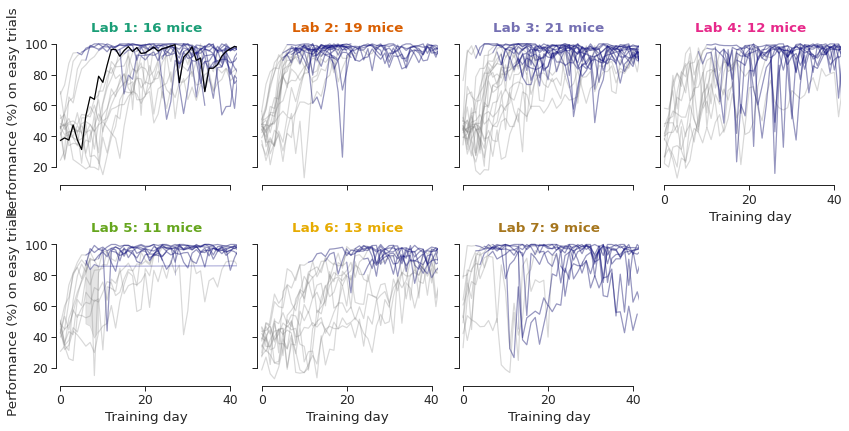

In [ ]:
behav['performance_easy'] = behav.performance_easy * 100
behav['performance_easy_trained'] = behav.performance_easy_trained * 100

# plot one curve for each animal, one panel per lab
fig = sns.FacetGrid(behav,
                    col="institution_code", col_wrap=4, col_order=col_names,
                    sharex=True, sharey=True, aspect=1, hue="subject_uuid", xlim=[-1, 41.5])
fig.map(sns.lineplot, "training_day",
        "performance_easy", color='gray', alpha=0.3)
fig.map(sns.lineplot, "training_day",
        "performance_easy_trained", color='darkblue', alpha=0.3)
fig.set_titles("{col_name}")
for axidx, ax in enumerate(fig.axes.flat):
    ax.set_title(behav.institution_name.unique()[
                 axidx], color=pal[axidx], fontweight='bold')

# overlay the example mouse
sns.lineplot(ax=fig.axes[0], x='training_day', y='performance_easy', color='black',
             data=behav[behav['subject_nickname'].str.contains('KS014')], legend=False)

fig.set_axis_labels('Training day', 'Performance (%) on easy trials')
fig.despine(trim=True)

Performance on easy contrast trials (50% and 100% contrast) across mice and laboratories. Each panel represents a different lab, and each curve represents a mouse (gray). The transition from gray to blue indicates when performance criteria for "trained" are met. Black, performance for example mouse `KS014`

# Fig 2b - plot the learning curve averaged over animals for all institutions

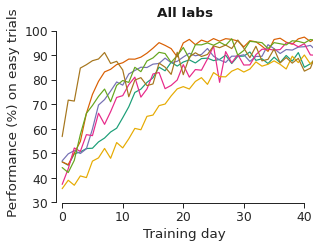

In [ ]:
# Plot all labs
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
sns.lineplot(x='training_day', y='performance_easy', hue='institution_code', palette=pal,
             ax=ax1, legend=False, data=behav, ci=None)
ax1.set_title('All labs', color='k', fontweight='bold')
ax1.set(xlabel='Training day',
        ylabel='Performance (%) on easy trials', xlim=[-1, 41.5])

seaborn_style()
plt.tight_layout(pad=2)

# Print some statistics

In [ ]:
behav_summary_std = behav.groupby(['training_day'])[
    'performance_easy'].std().reset_index()
behav_summary = behav.groupby(['training_day'])[
    'performance_easy'].mean().reset_index()
print('number of days to reach 80% accuracy on easy trials: ')
print(behav_summary.loc[behav_summary.performance_easy >
                        80, 'training_day'].min())

number of days to reach 80% accuracy on easy trials: 
14


# Conclusion

And that's it! You have now completed the introductory tutorials for navigating and accessing IBL data pipepline, and hopefully this gets sets you on a good track to take a deeper dive into this rich and exciting datasets.

Be sire tp visit [DataJoint.io](https://datajoint.io) for further learning resources for DataJoint. Also be sure to signup to our DataJoint Slack group (link on the website) to join the vibrant DataJoint user community!